# Benchmark Comparisons

Compare my implementations and Spinning Up versions of RL algos on MuJoCo Gym tasks.
https://spinningup.openai.com/en/latest/spinningup/bench.html

In [848]:
import glob, os, sys
import pandas as pd
import plotnine as pn
DATA_DIR = '/Users/kurtsmith/research/spinningup/data'
pd.options.display.max_columns=None

In [849]:
task_list = ['halfcheetah_v3', 'hopper_v3', 'walker2d_v3', 'swimmer_v3', 'ant_v3']
method_list = ['su_ppo', 'ppo', 'su_ddpg', 'ddpg', 'su_td3', 'td3', 'su_sac', 'sac']
output_paths = {}
full_data = {}
for task in task_list:
    output_paths[task] = {}
    full_data[task] = {}
    for method in method_list:
        my_path = f'{DATA_DIR}/{task}/{method}'
        if os.path.exists(my_path):
            output_paths[task][method] = os.listdir(my_path)

In [850]:
for task in task_list:
    for method in output_paths[task].keys():
        results = []
        for run in output_paths[task][method]:
#             print(f'{task} {method} {run}')
            progress = pd.read_table(f'{DATA_DIR}/{task}/{method}/{run}/progress.txt')
            progress['Minutes'] =  progress['Time']/60.
            progress['Hours'] =  progress['Time']/60./60.
            progress['task'] = task
            progress['method'] = method
            progress['run'] = run
            results.append(progress)
        if len(results)>0:
            full_data[task][method] = pd.concat(results)

In [851]:
def plot_run_returns(df, col=None, task=None, method=None, line=True, points=False):
    if col is None:
        col = 'AverageTestEpRet' if 'AverageTestEpRet' in df.columns else 'AverageEpRet'
    plot = pn.ggplot(df, pn.aes(x='TotalEnvInteracts', y=col))
    if line:
        plot += pn.geom_line(pn.aes(color='run'))
    if points:
        plot += pn.geom_point(pn.aes(color='run'))
    if task is not None:
        plot += pn.labels.ggtitle(f'{task} : {method}')        
    return plot

def plot_smoothed_returns(df, window_size, plot=True, label='smoothed', **kwargs):
    df_smooth = df.groupby('TotalEnvInteracts').mean().reset_index()
    df_smooth = df_smooth.rolling(window_size).mean()
    df_smooth = df_smooth.dropna()
    df_smooth['run'] = label
    if plot:
        return plot_run_returns(df_smooth, **kwargs)
    else:
        return df_smooth


def compare_runs(task, **kwargs):
    for method in full_data[task].keys():
        display(plot_run_returns(full_data[task][method], task=task, method=method, **kwargs))

def compare_smoothed_returns(task):
    for method in full_data[task].keys():
        if not 'su_' in method:
            df_mine = plot_smoothed_returns(full_data[task][method], 4, plot = False, label='Mine')
            df_su = plot_smoothed_returns(full_data[task]['su_' + method], 4, plot = False, label='Spinning Up')
            display(plot_run_returns(pd.concat((df_mine, df_su)),
                                     task=task, method=method, points=True))

# Plot Performance on each task

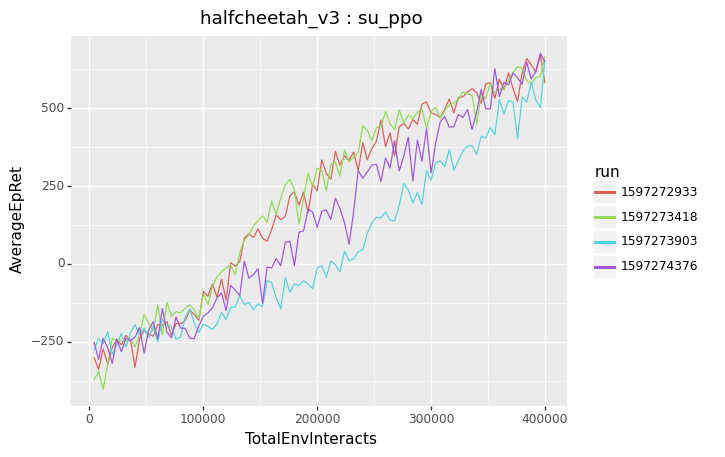

<ggplot: (8762405016945)>

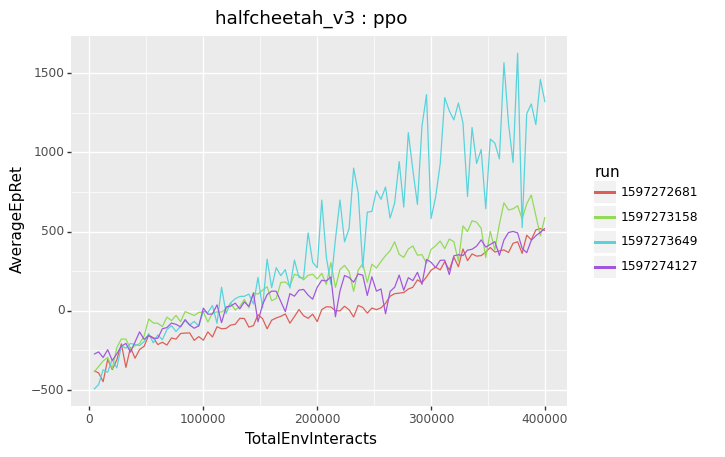

<ggplot: (-9223363274516743315)>

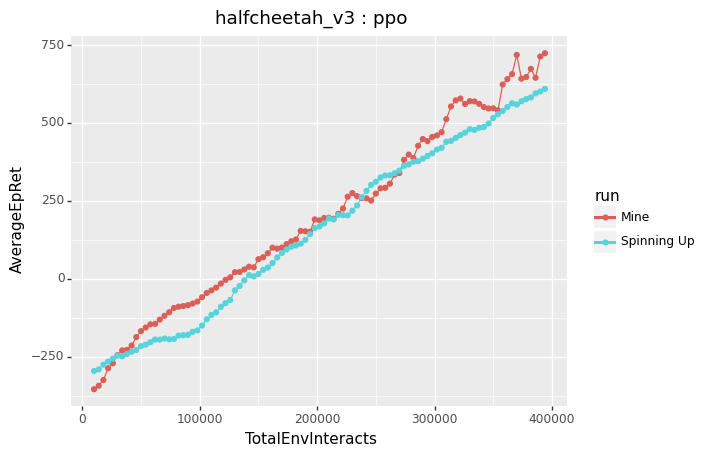

<ggplot: (8762262904033)>

In [852]:
task = 'halfcheetah_v3'
compare_runs(task)
compare_smoothed_returns(task)

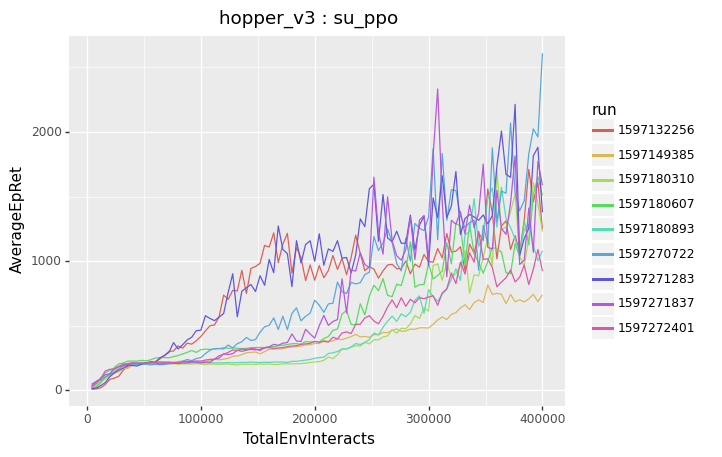

<ggplot: (-9223363274600226367)>

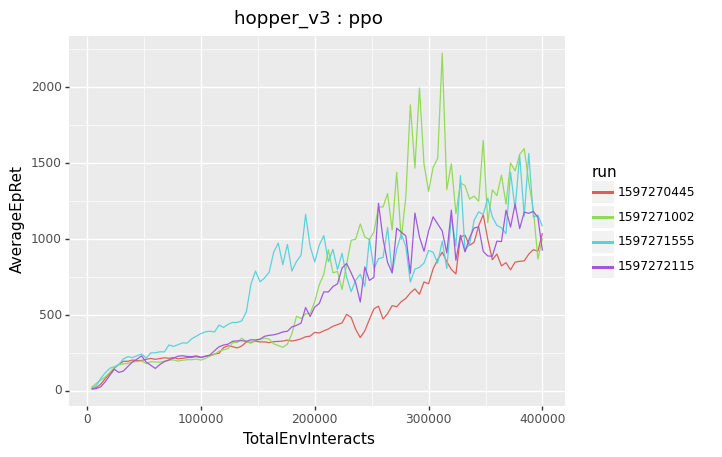

<ggplot: (-9223363274591749460)>

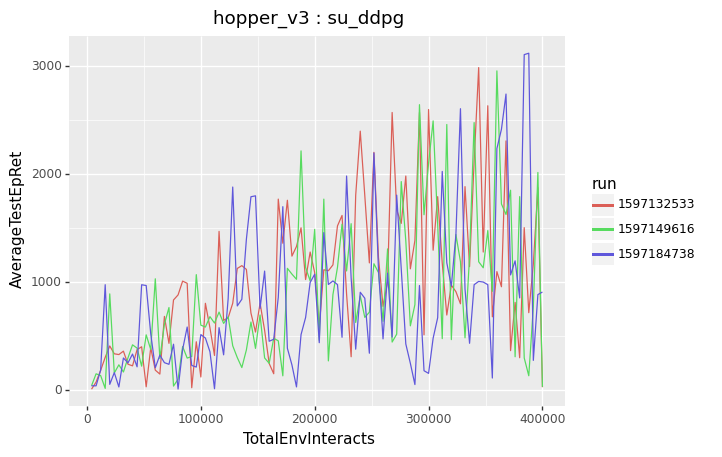

<ggplot: (-9223363274591749460)>

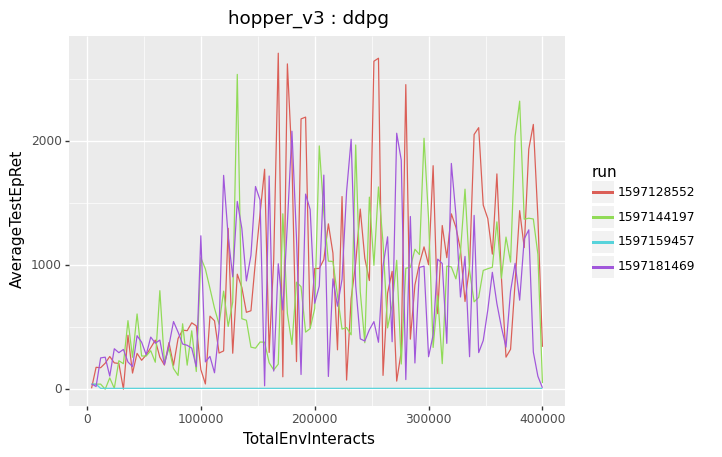

<ggplot: (-9223363274591749460)>

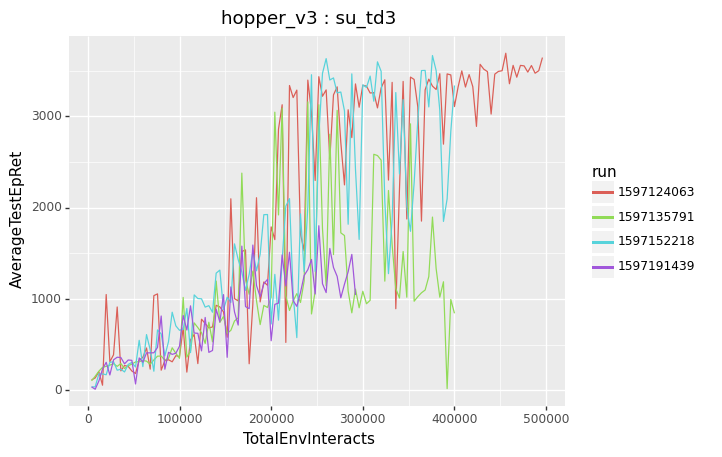

<ggplot: (-9223363274591749460)>

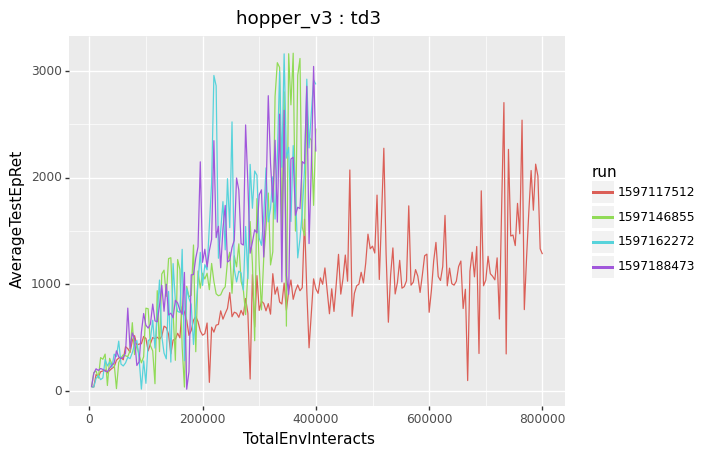

<ggplot: (-9223363274591749460)>

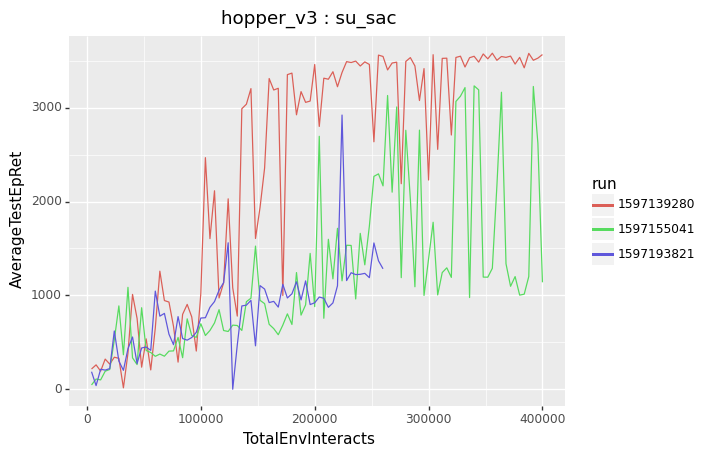

<ggplot: (-9223363274591749460)>

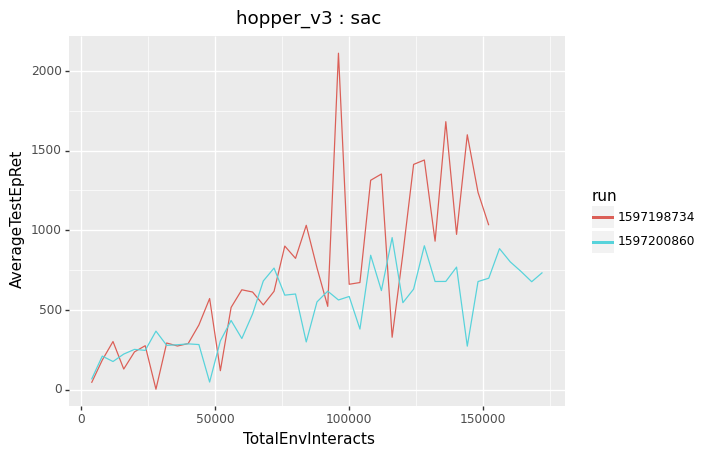

<ggplot: (-9223363274591749460)>

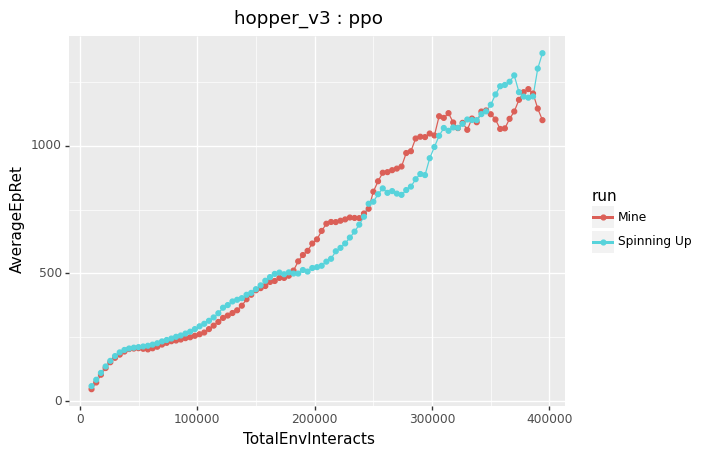

<ggplot: (8762279129685)>

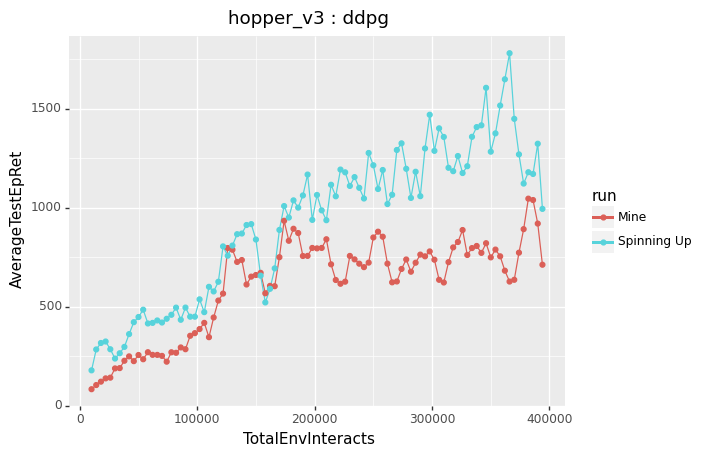

<ggplot: (-9223363274600400163)>

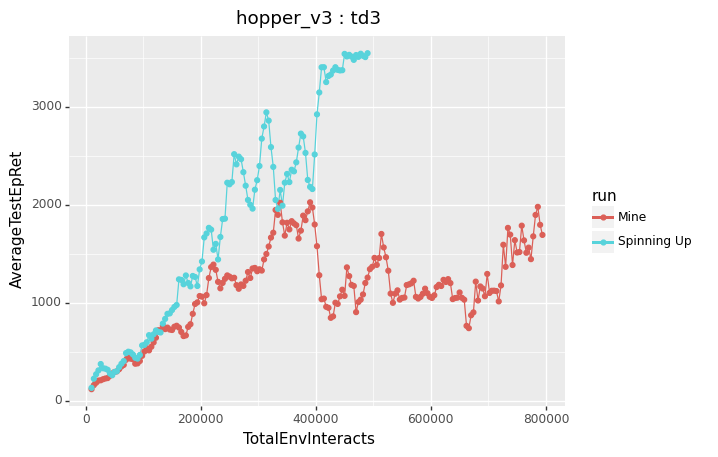

<ggplot: (8762287883184)>

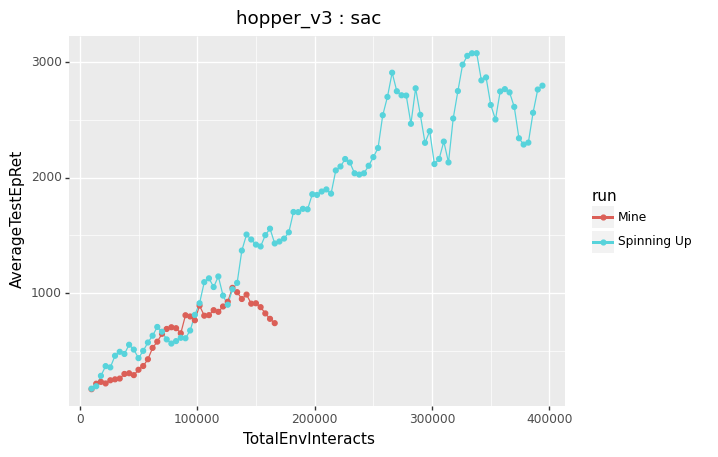

<ggplot: (8762320842304)>

In [853]:
task = 'hopper_v3'
compare_runs(task)
compare_smoothed_returns(task)

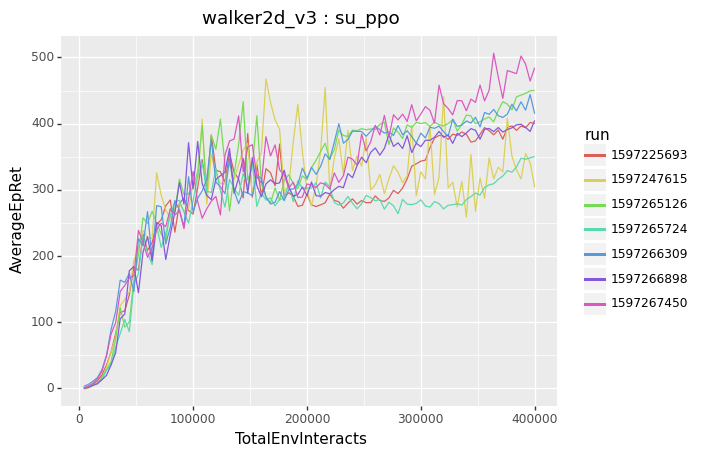

<ggplot: (-9223363274591749460)>

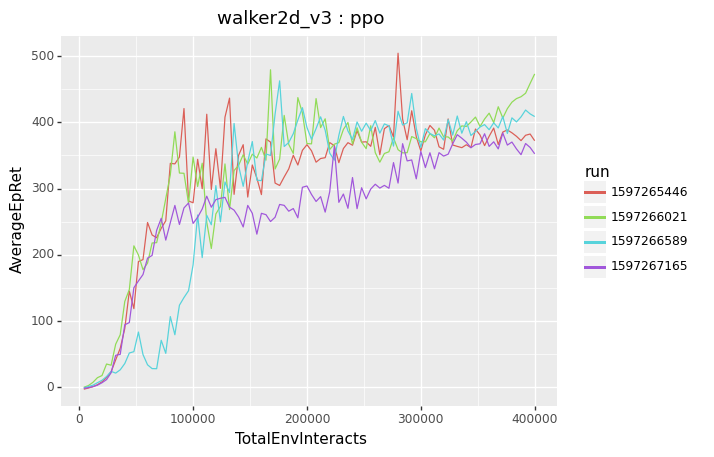

<ggplot: (-9223363274591749460)>

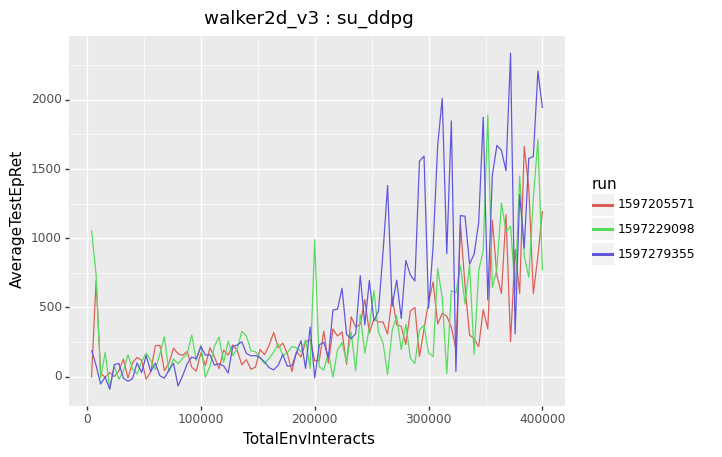

<ggplot: (-9223363274591749460)>

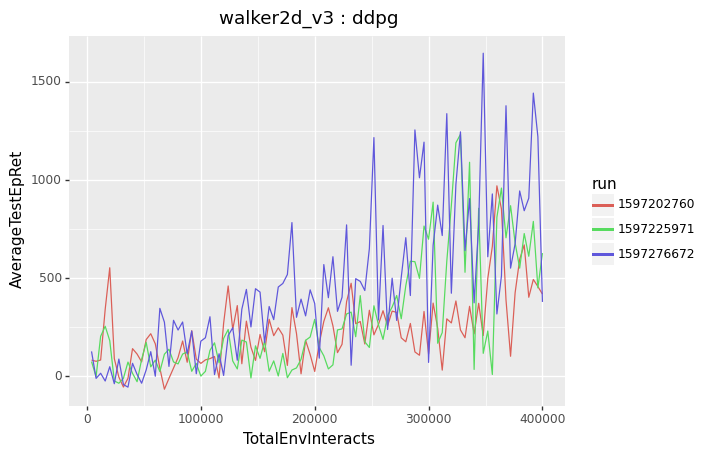

<ggplot: (-9223363274591749460)>

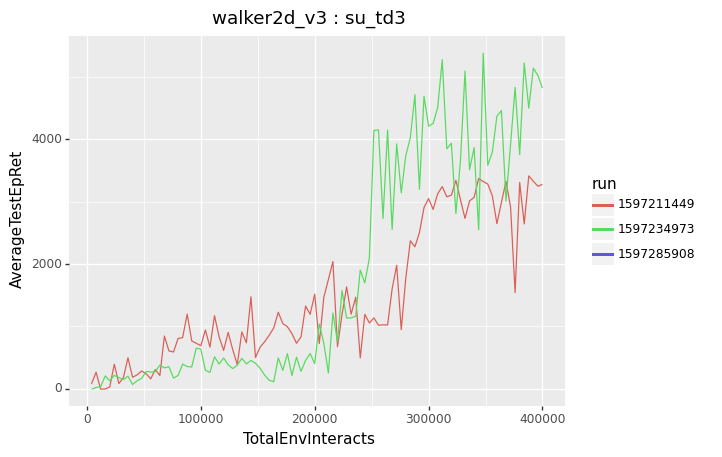

<ggplot: (-9223363274591749460)>

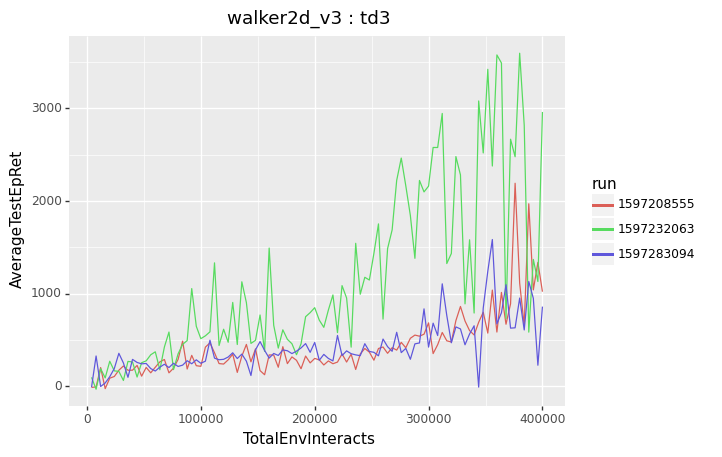

<ggplot: (-9223363274591749460)>

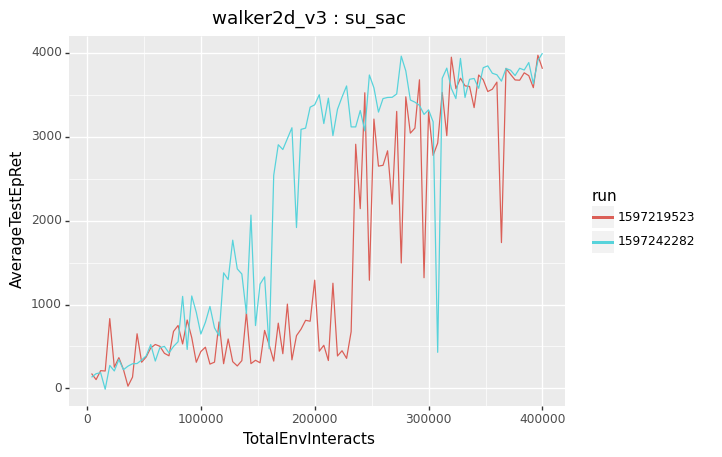

<ggplot: (-9223363274591749460)>

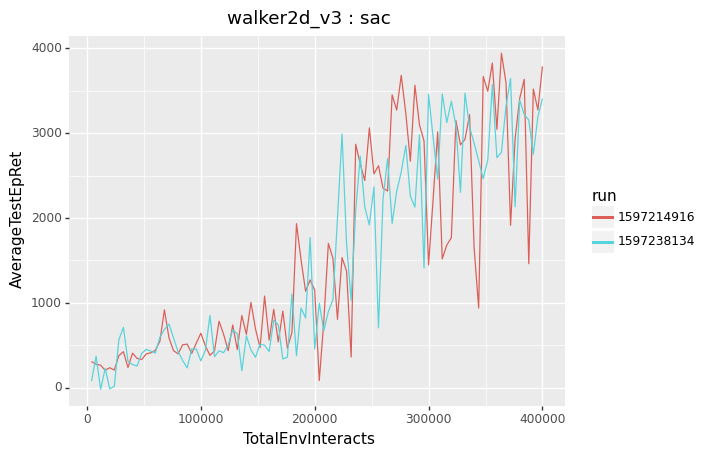

<ggplot: (-9223363274591749460)>

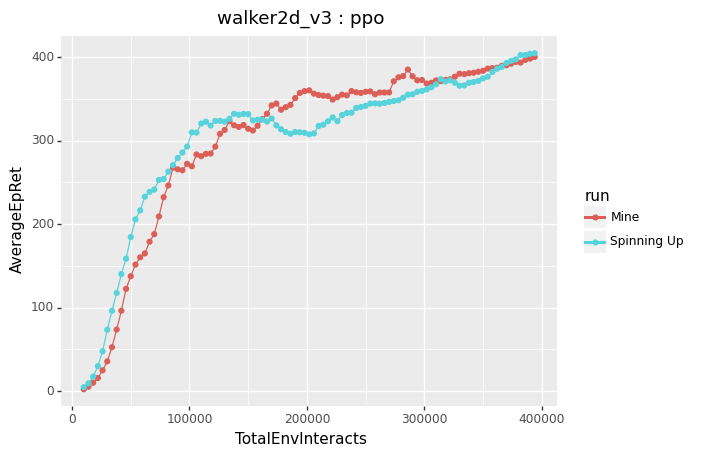

<ggplot: (8762271213737)>

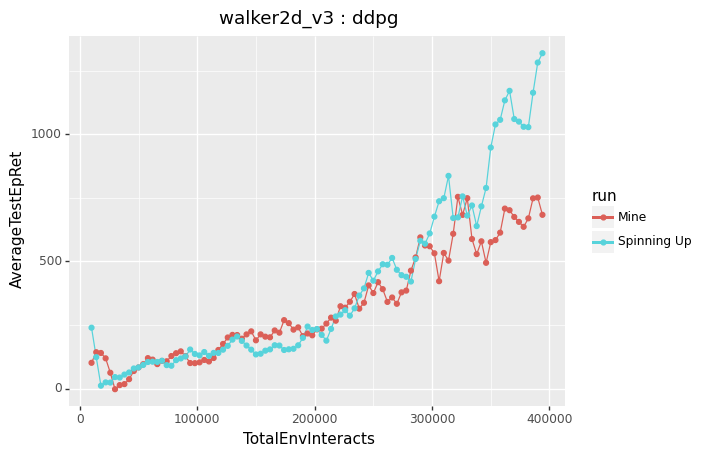

<ggplot: (8762320833172)>

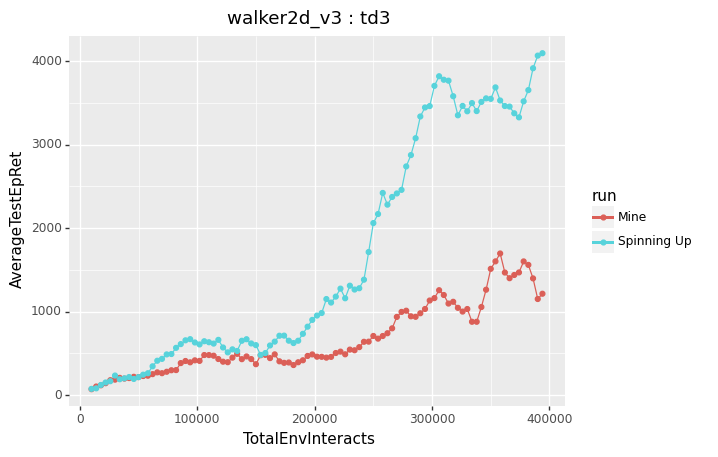

<ggplot: (8762262419527)>

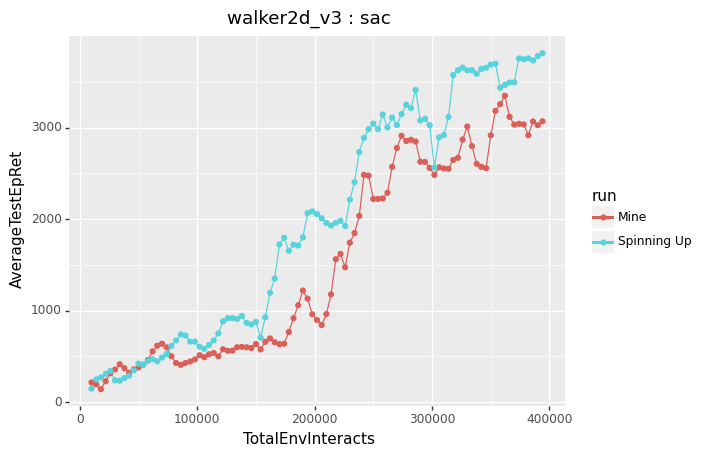

<ggplot: (-9223363274583706087)>

In [854]:
task = 'walker2d_v3'
compare_runs(task)
compare_smoothed_returns(task)

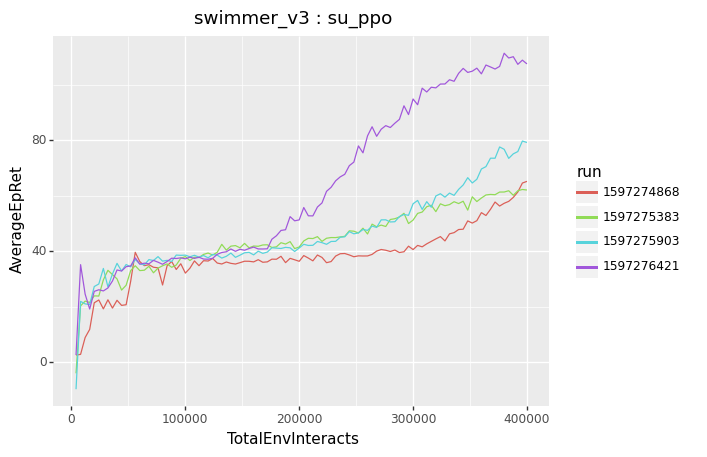

<ggplot: (8762262358697)>

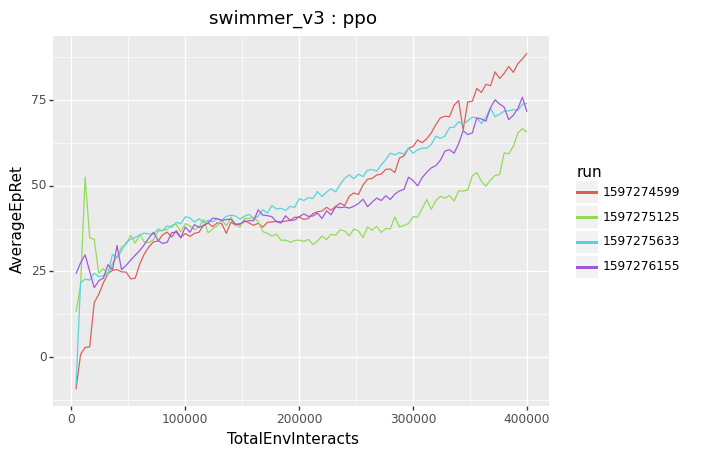

<ggplot: (-9223363274583755278)>

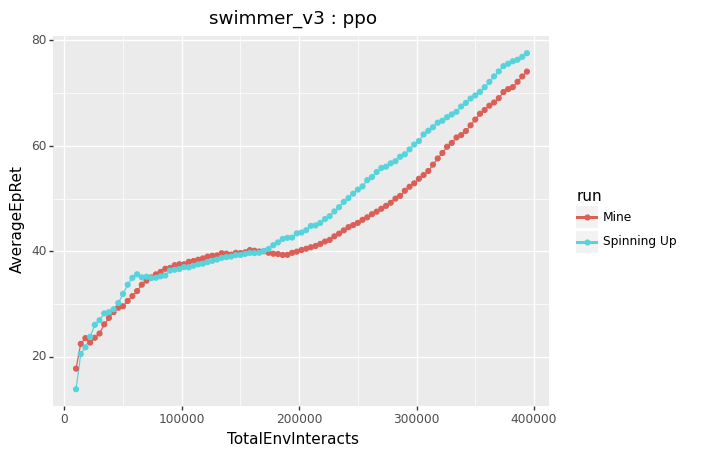

<ggplot: (8762287399474)>

In [855]:
task = 'swimmer_v3'
compare_runs(task)
compare_smoothed_returns(task)

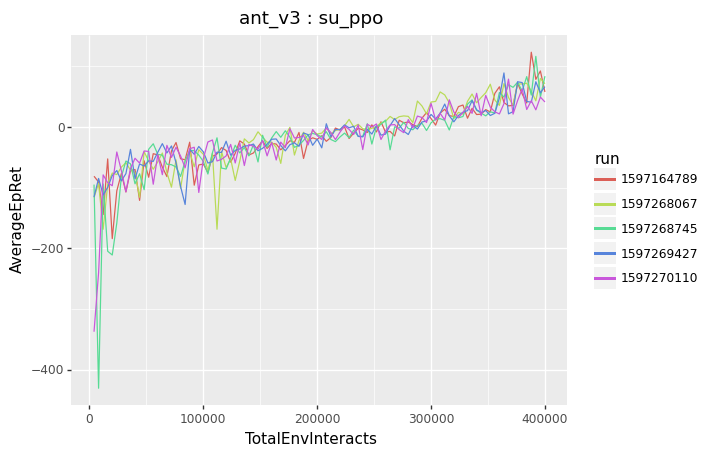

<ggplot: (-9223363274466546004)>

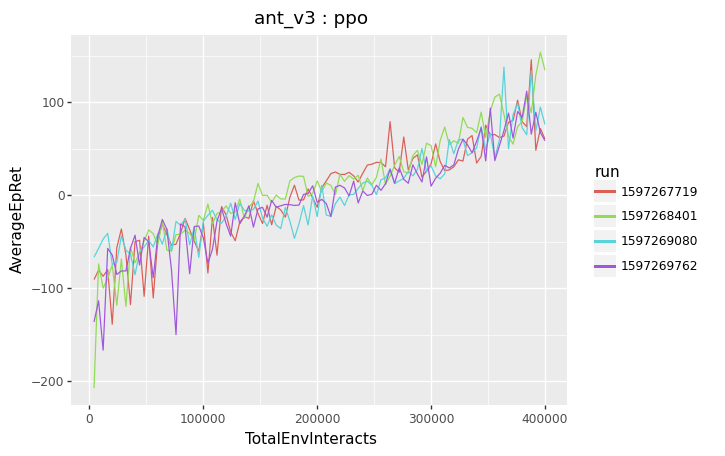

<ggplot: (8762278983067)>

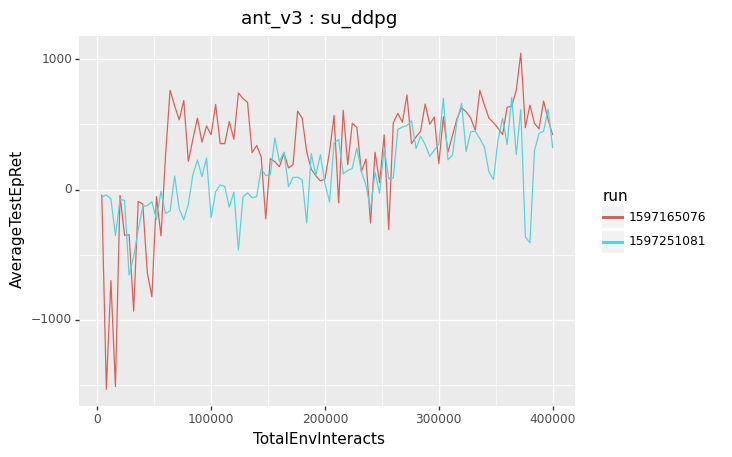

<ggplot: (8762278983067)>

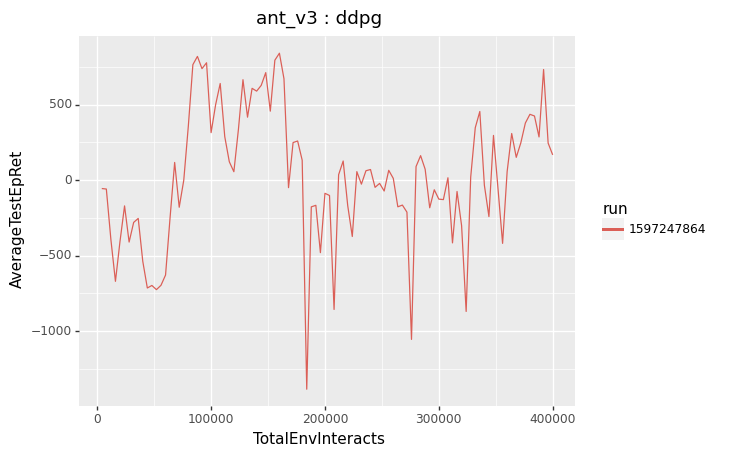

<ggplot: (8762262436763)>

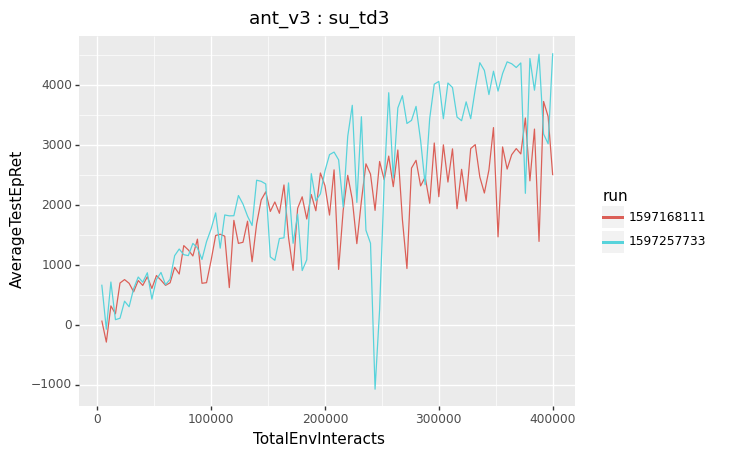

<ggplot: (8762262436763)>

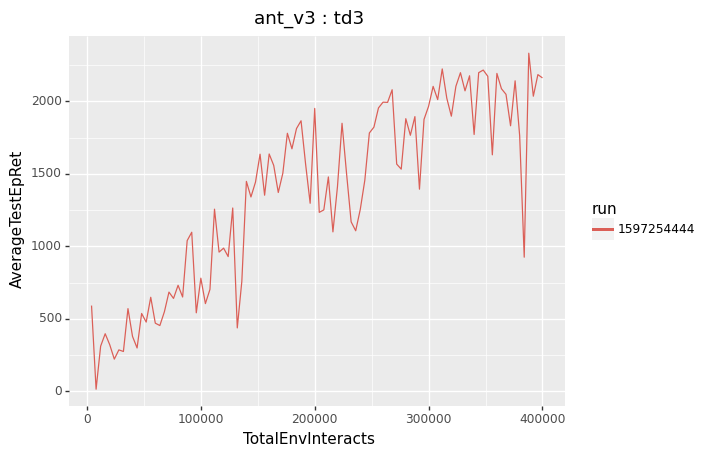

<ggplot: (8762262436763)>

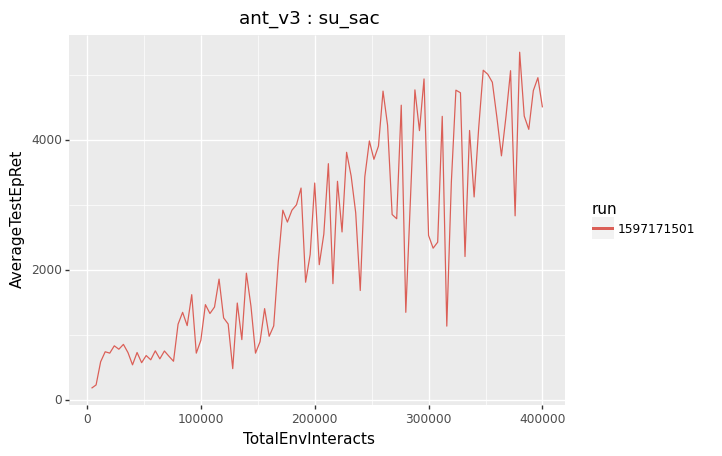

<ggplot: (8762262436763)>

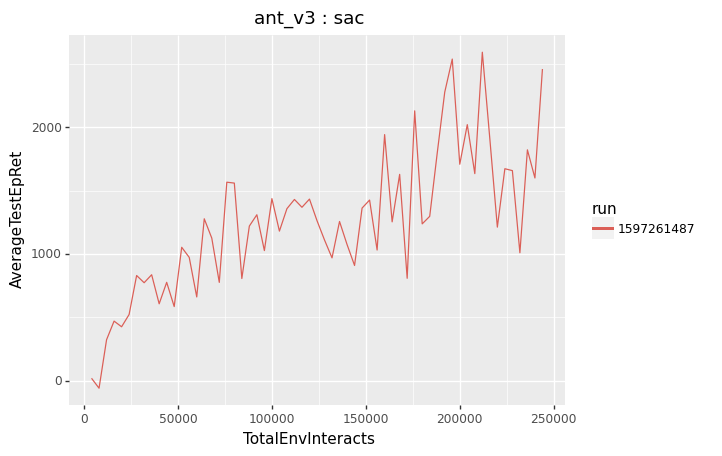

<ggplot: (8762262436763)>

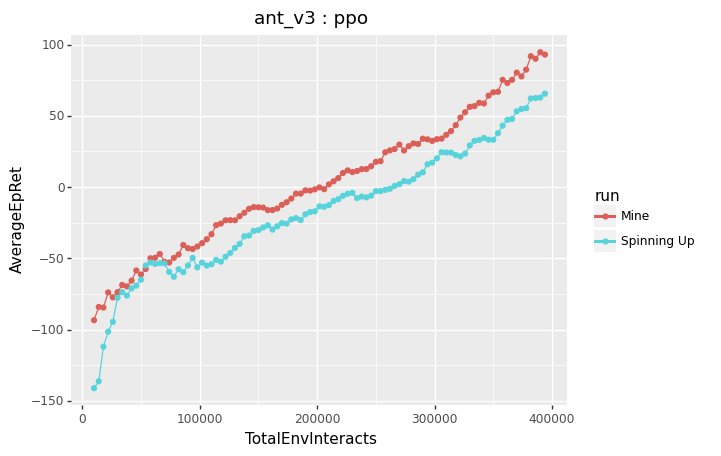

<ggplot: (8762271010529)>

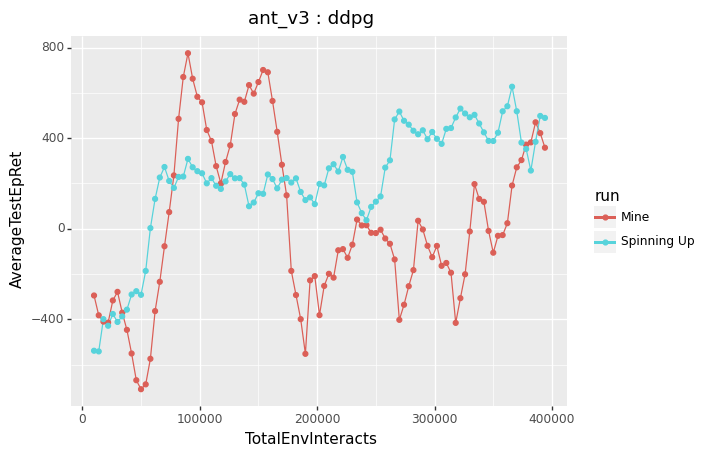

<ggplot: (8762254187570)>

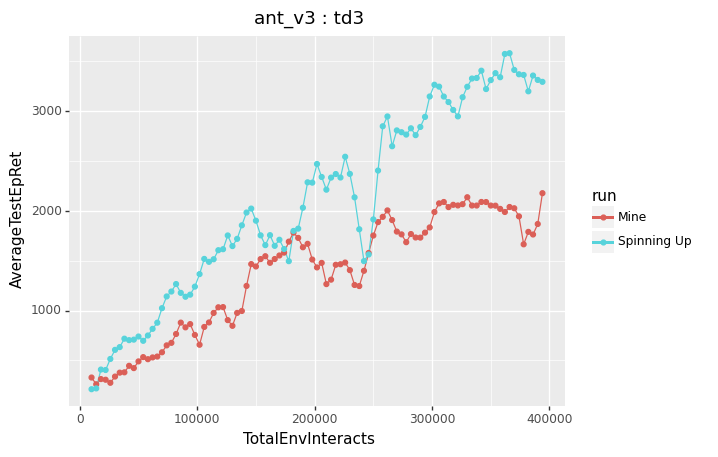

<ggplot: (-9223363274466546046)>

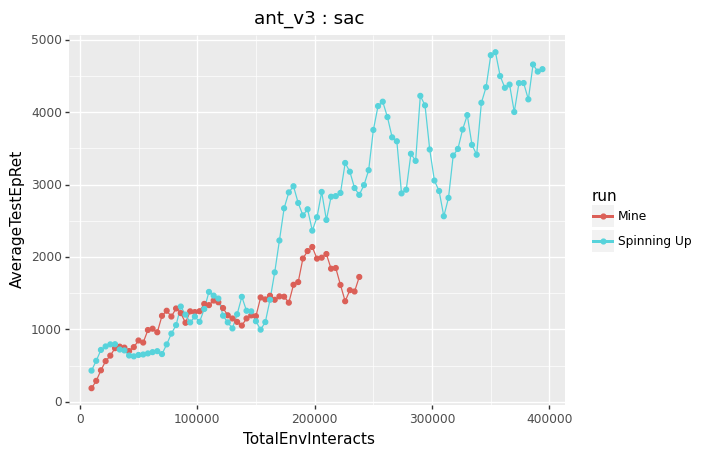

<ggplot: (8762337839494)>

In [856]:
task = 'ant_v3'
compare_runs(task)
compare_smoothed_returns(task)

******************************
halfcheetah_v3
******************************


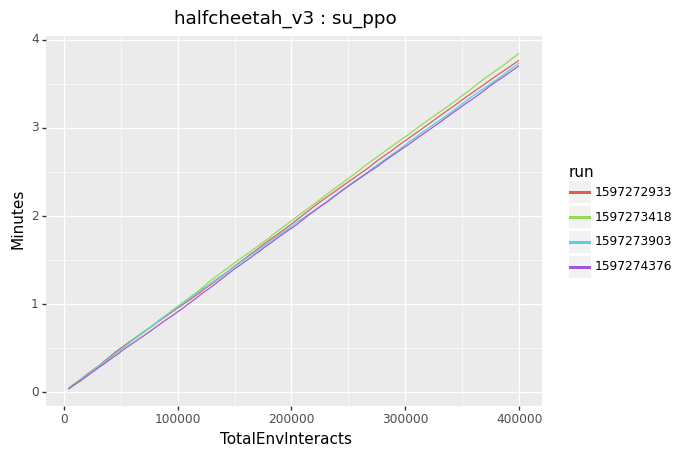

<ggplot: (8762379731432)>

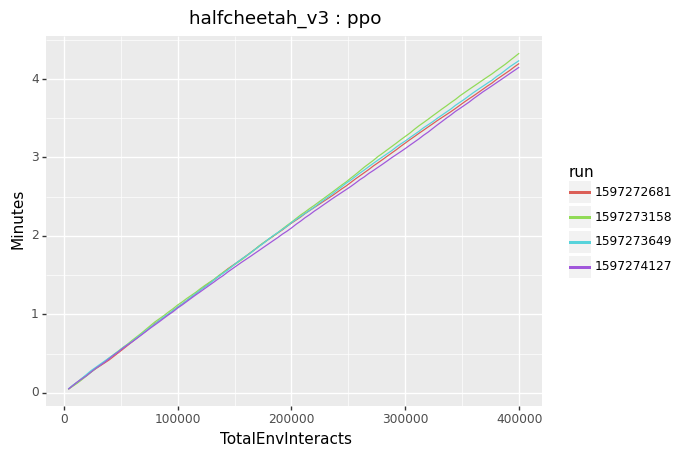

<ggplot: (8762379731432)>

******************************
hopper_v3
******************************


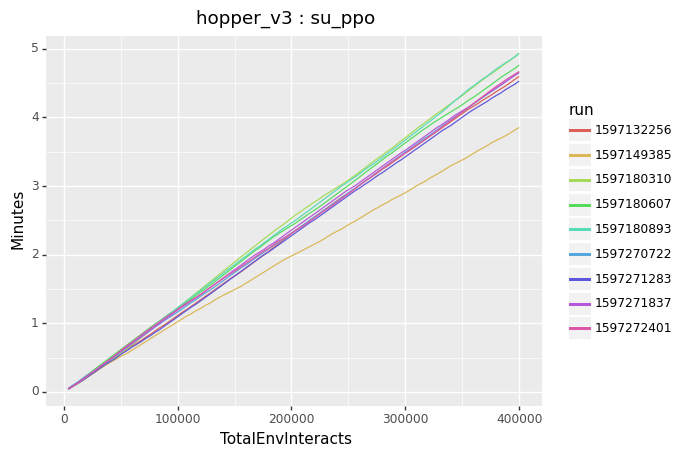

<ggplot: (8762379731432)>

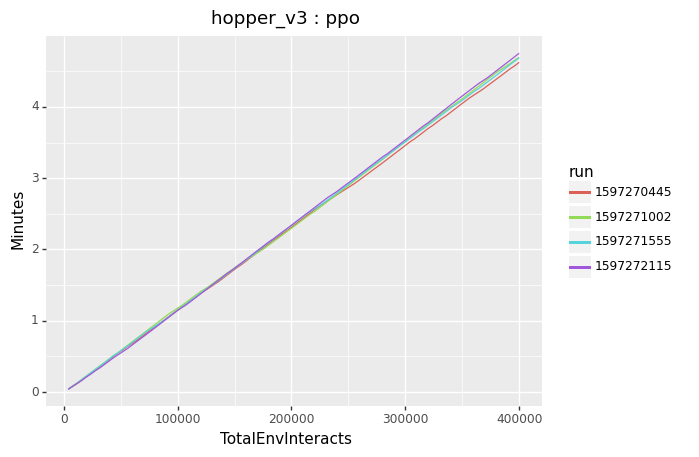

<ggplot: (8762379731432)>

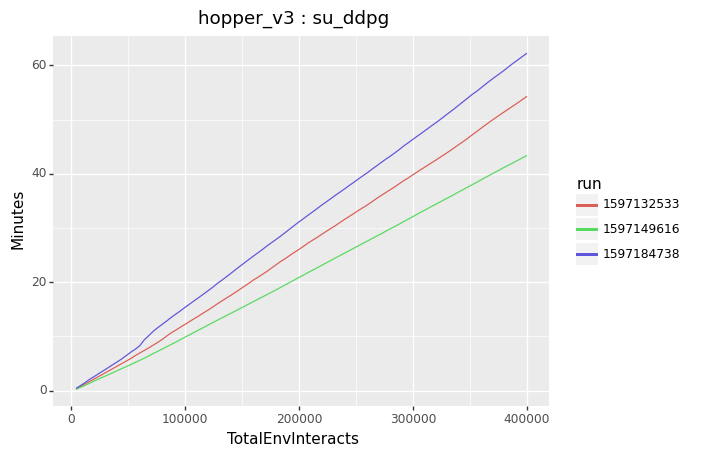

<ggplot: (8762379731432)>

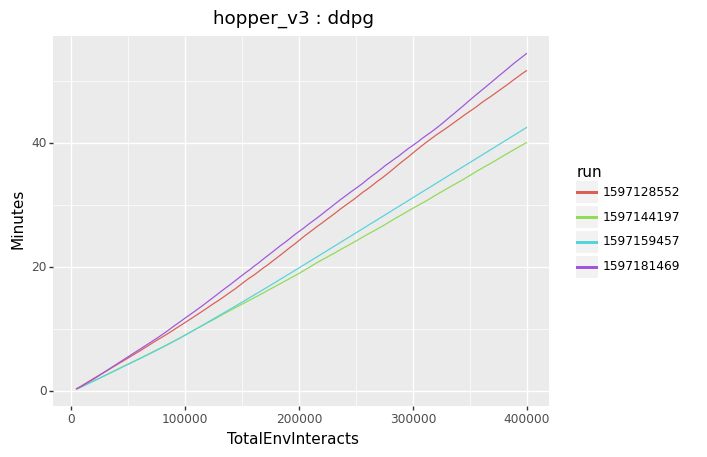

<ggplot: (8762379731432)>

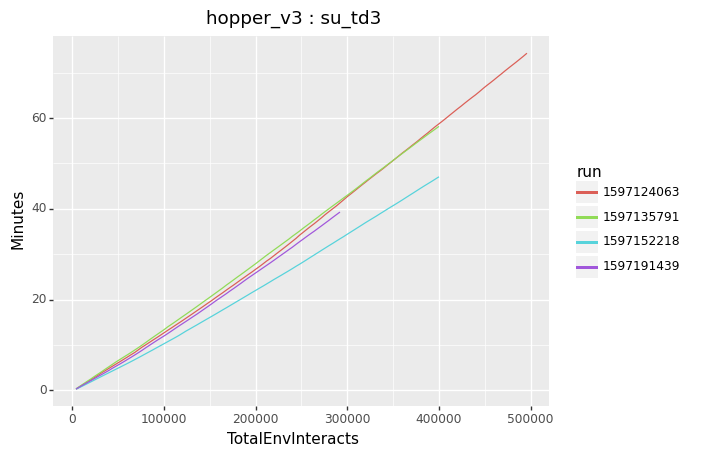

<ggplot: (8762379731432)>

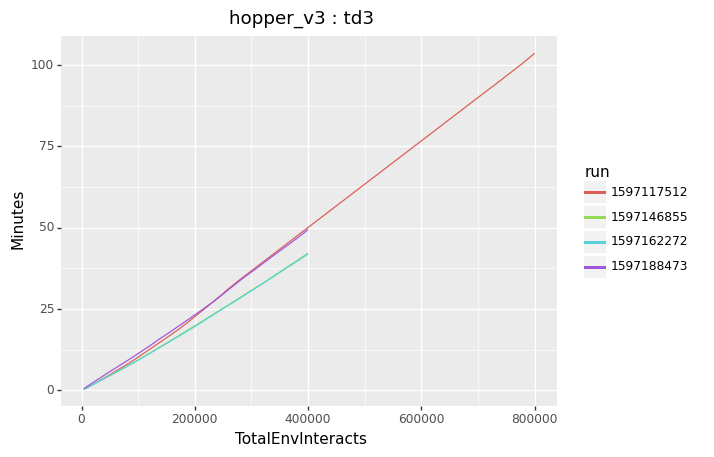

<ggplot: (8762379731432)>

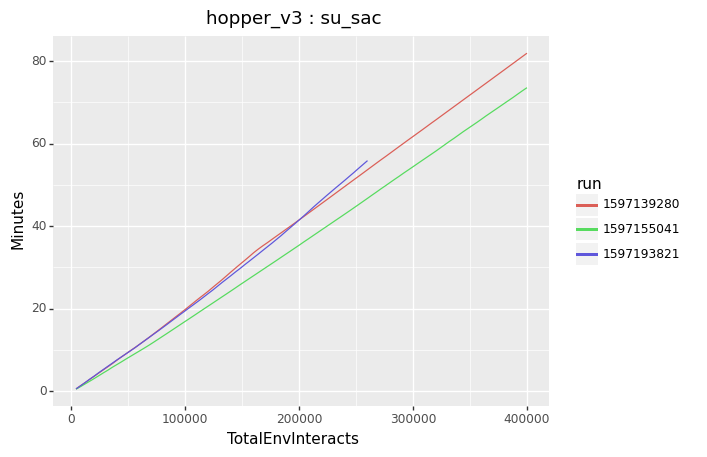

<ggplot: (8762379731432)>

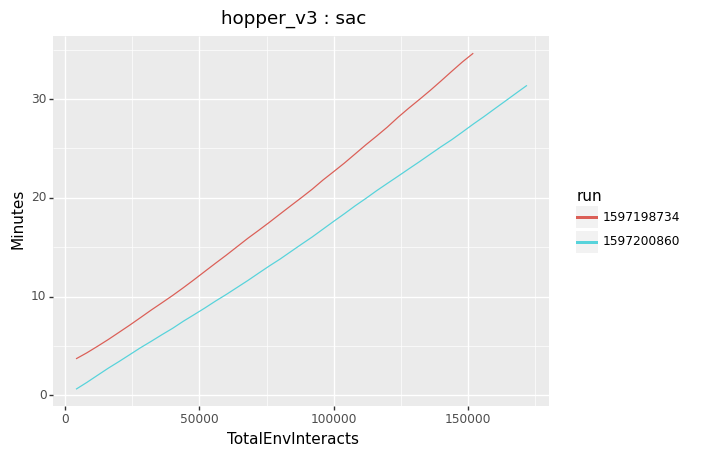

<ggplot: (8762379731432)>

******************************
walker2d_v3
******************************


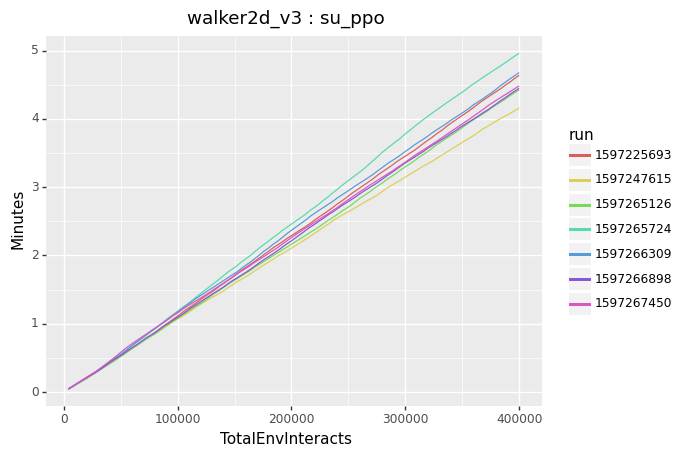

<ggplot: (8762379731432)>

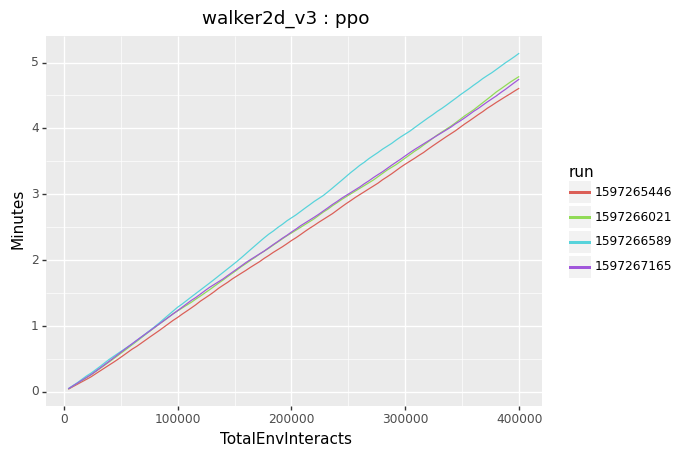

<ggplot: (8762379731432)>

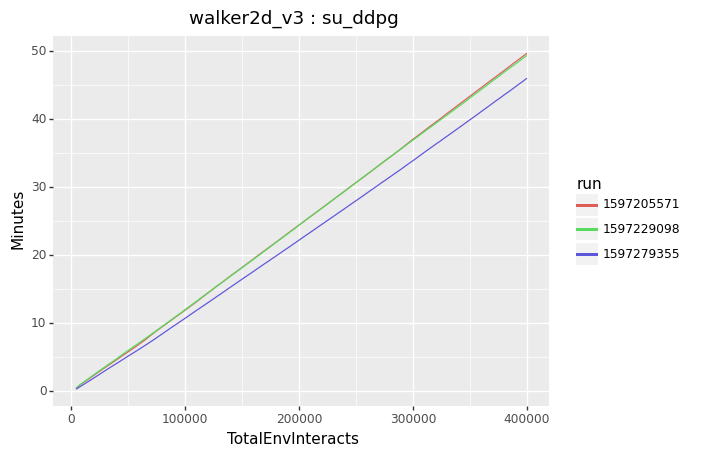

<ggplot: (8762379731432)>

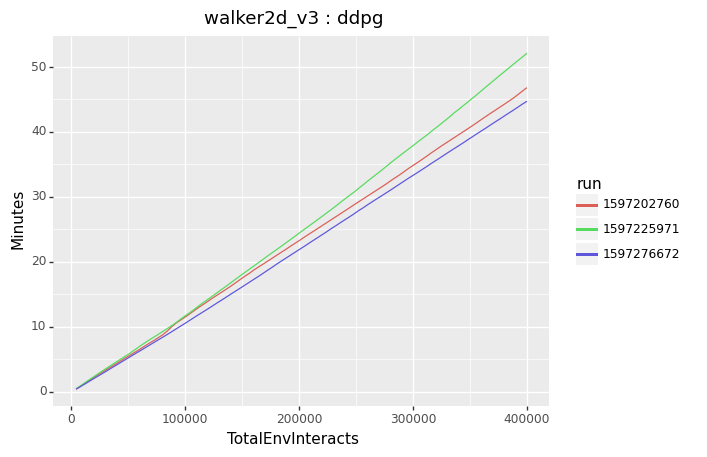

<ggplot: (8762379731432)>

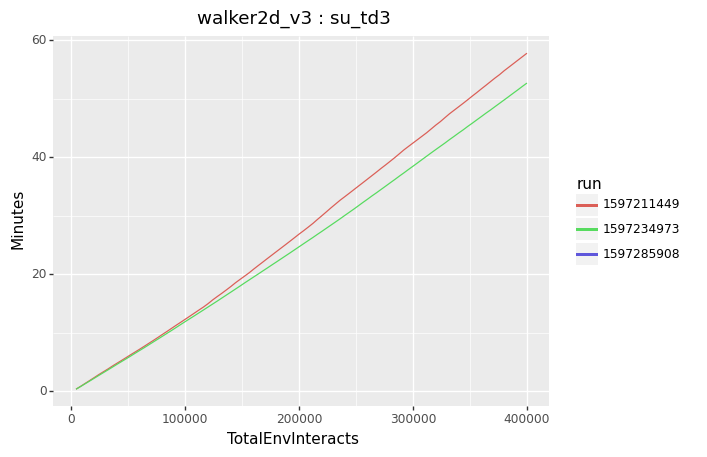

<ggplot: (8762379731432)>

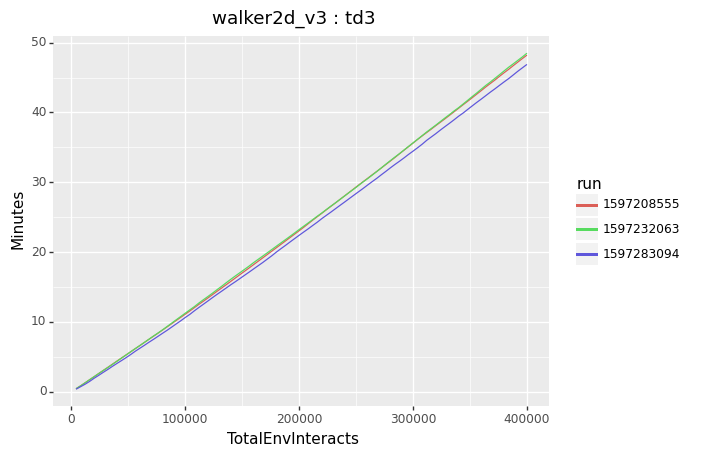

<ggplot: (-9223363274575637027)>

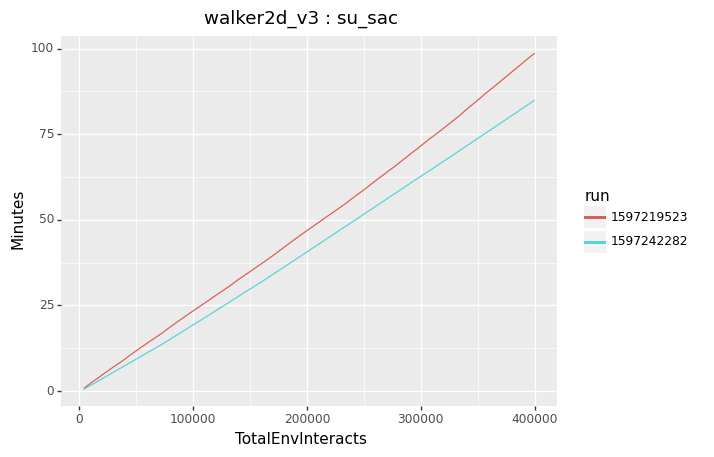

<ggplot: (-9223363274575637027)>

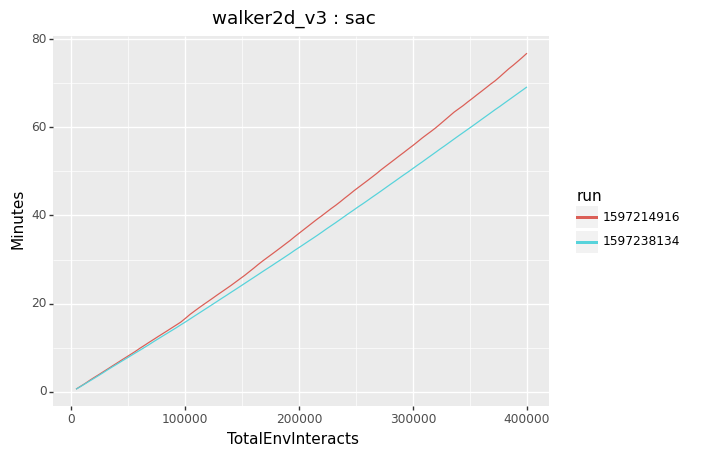

<ggplot: (-9223363274575637027)>

******************************
swimmer_v3
******************************


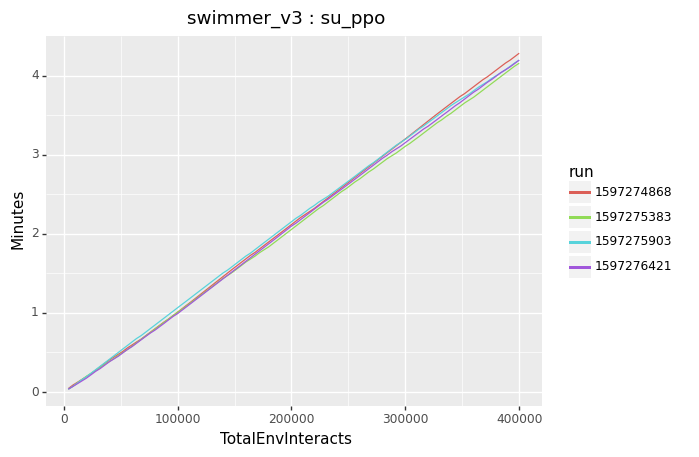

<ggplot: (8762270833707)>

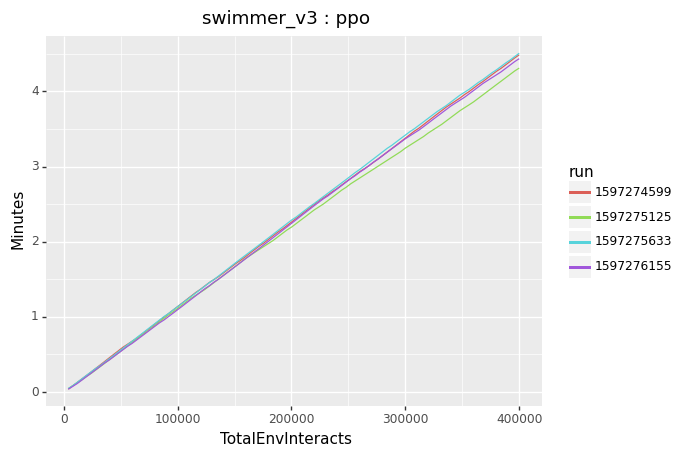

<ggplot: (-9223363274592350965)>

******************************
ant_v3
******************************


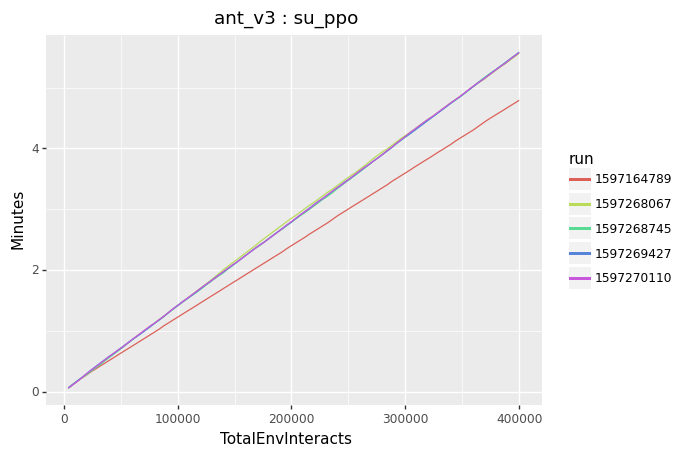

<ggplot: (-9223363274592350965)>

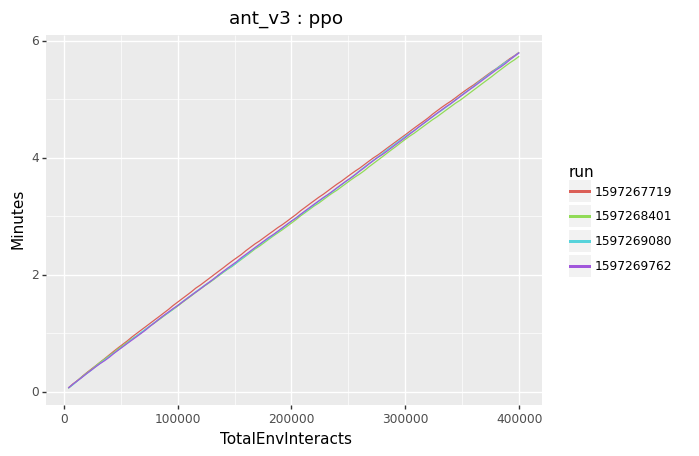

<ggplot: (-9223363274592350965)>

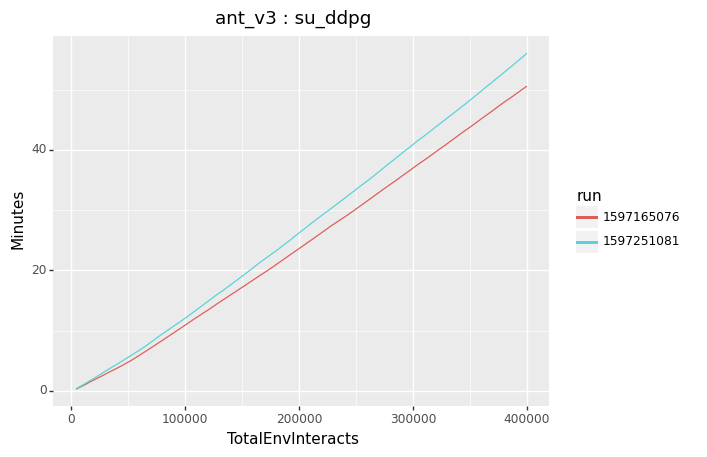

<ggplot: (-9223363274592350965)>

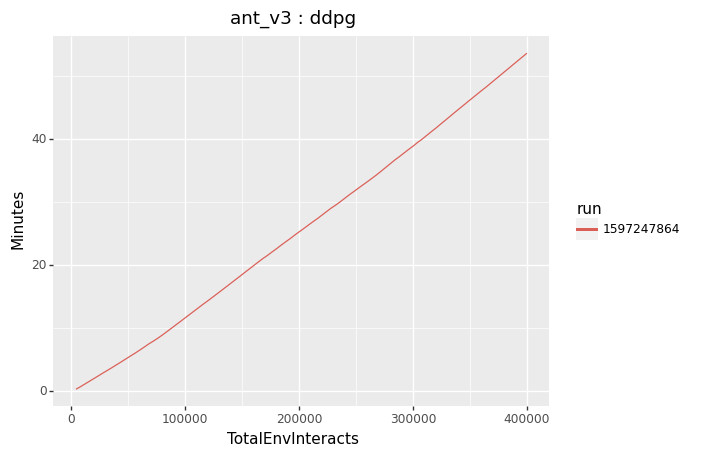

<ggplot: (-9223363274592350965)>

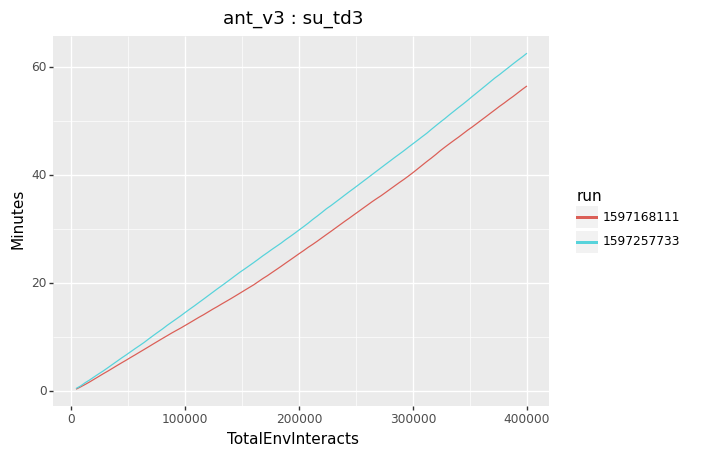

<ggplot: (-9223363274592350965)>

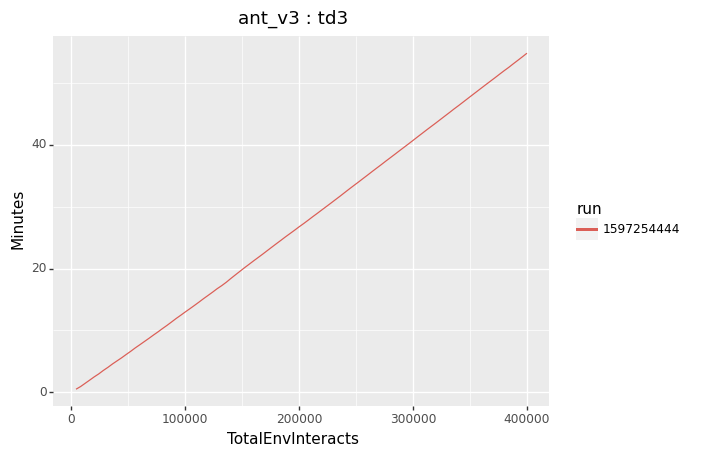

<ggplot: (-9223363274592350965)>

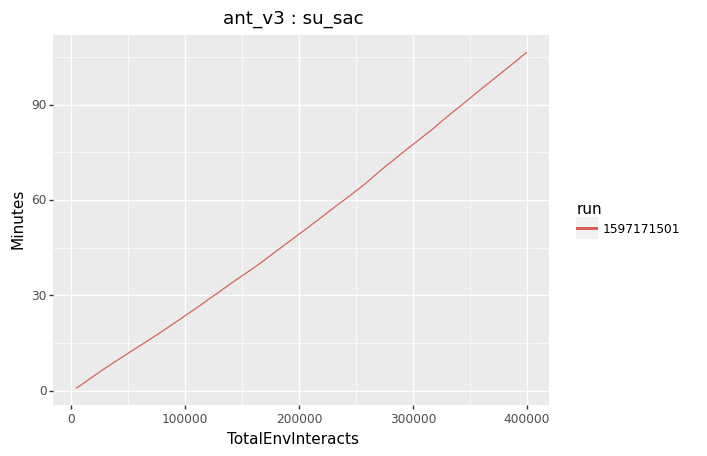

<ggplot: (-9223363274592350965)>

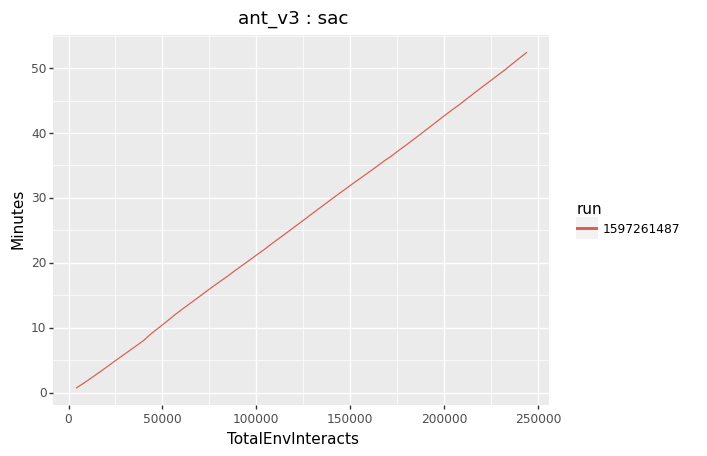

<ggplot: (-9223363274592350965)>

In [857]:
for task in task_list:
    print('******************************')
    print(task)
    print('******************************')
    compare_runs(task, col='Minutes')

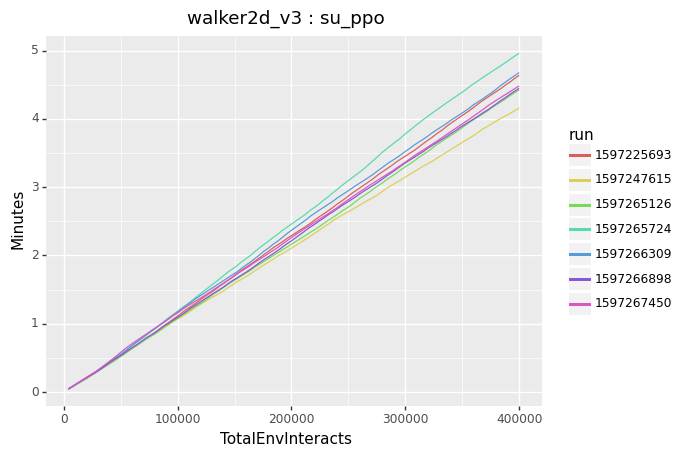

<ggplot: (-9223363274592352291)>

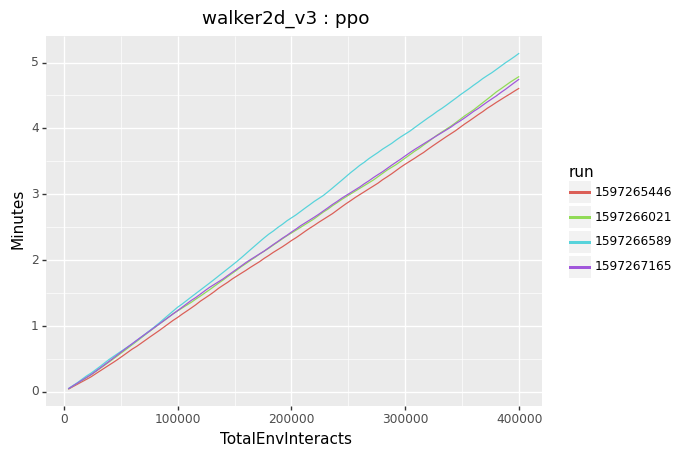

<ggplot: (-9223363274592352291)>

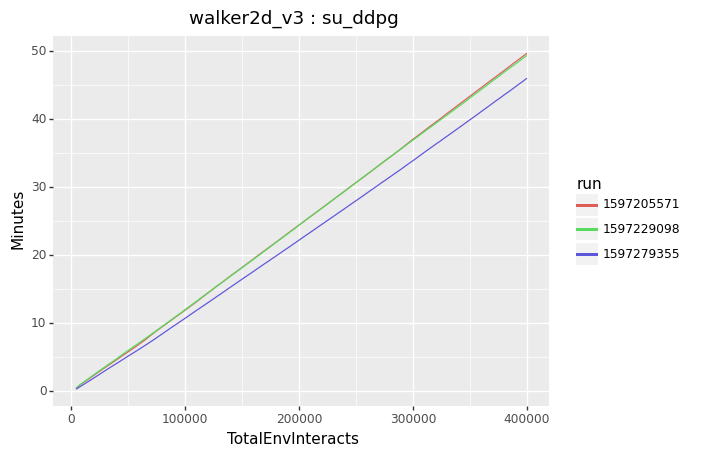

<ggplot: (-9223363274592352291)>

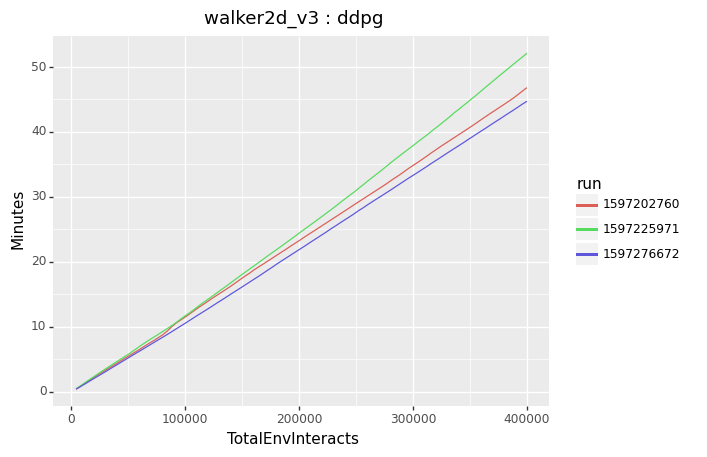

<ggplot: (-9223363274592352291)>

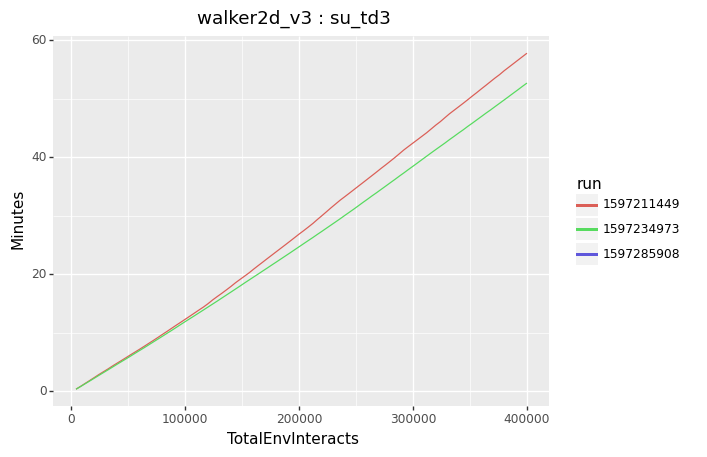

<ggplot: (-9223363274592352291)>

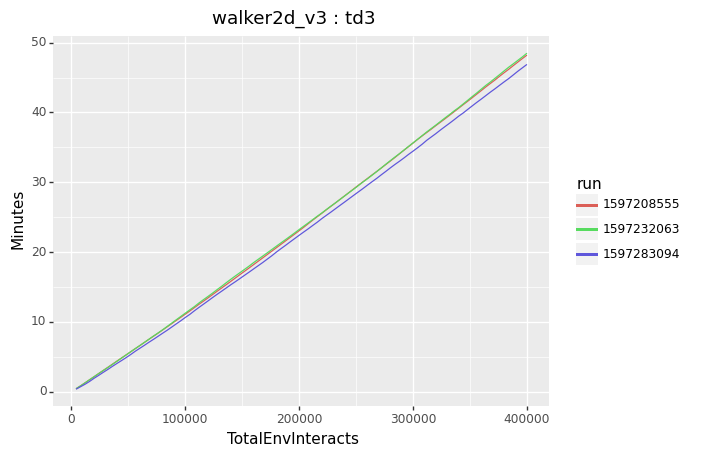

<ggplot: (-9223363274592352291)>

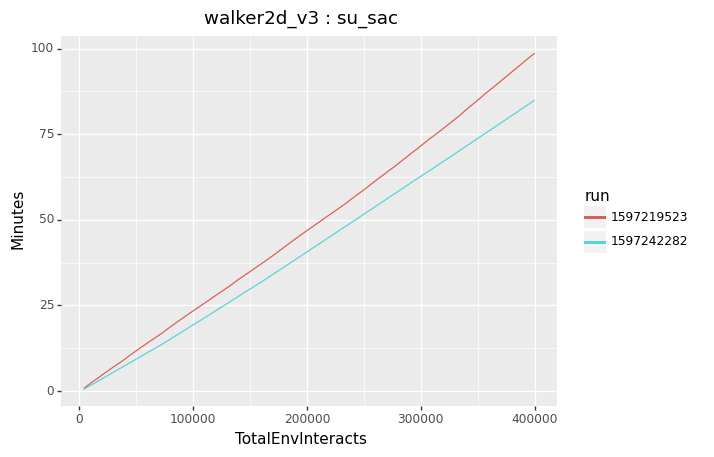

<ggplot: (-9223363274592352291)>

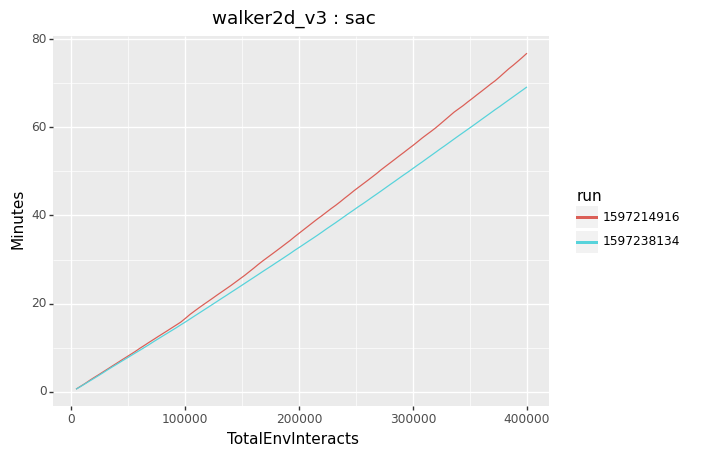

<ggplot: (-9223363274592352291)>

In [858]:
task = 'walker2d_v3'
compare_runs(task, col='Minutes')